In [1]:
import numpy
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp
from sympy import symbols, diff
from sympy.utilities.lambdify import lambdify
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from rouwen import rouwen


# Problem 1
Taking partial derivatives one more time yields $$X_{uuu} =-\frac{F_{xxx}X_u^3 + 3F_{xxu}X_u^2 + 3F_{xx}X_{uu}X_u + 3F_{xuu}x_u + 3F_{xu}X_{uu} + F_{uuu}}{F_x}.$$

In [39]:
#Problem 2

alpha = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

def labor_eq(w, *args):
    alpha, z, k, b, t, h = args
    labor_demand = ((1 - alpha) * z/w) ** (1/alpha) * k
    pi = z * k ** alpha* labor_demand ** (1 - alpha) - w * labor_demand
    labor_supply = h - b/(w * (1 + b)) * (w * h + pi -t)
    return labor_demand - labor_supply

#solve for the equilibrium wage

args = (alpha, z, k, b, t, h)
w = opt.fsolve(labor_eq, 0.8, args = args)[0]
print(w)

0.627361779043999


In [40]:
#define methods to solve derivatives numerically (finite difference)
def first_deriv(f, x0, h=1e-2):
    return (f(x0+h)-f(x0-h))/(2*h)

def second_deriv(f, x0, h=1e-2):
    return (f(x0+h)+f(x0-h)-2*f(x0))/(h**2)

def first_approx(f, x0, x):
    fp = first_deriv(f, x0)
    return f(x0) + fp * (x - x0)
    
def second_approx(f, x0, x):
    fp = first_deriv(f, x0)
    fpp = second_deriv(f, x0)
    return f(x0) + fp * (x - x0) + (1/2) * fpp * (x - x0) ** 2

#approximate about the steady state

def get_w_ss(k1, w_guess):
    args = (alpha, z, k1, b, t, h)
    return opt.fsolve(labor_eq, w_guess, args = (args))[0]

def f(k):
    return get_w_ss(k, 0.2)
    
print("First Order Approximation of f evaluated at 5.1: ", first_approx(f, 5, 5.1))
print("Second Order Approximation of f evaluated at 5.1: ", second_approx(f, 5, 5.1))

First Order Approximation of f evaluated at 5.1:  0.6315203597828456
Second Order Approximation of f evaluated at 5.1:  0.6314924977972269


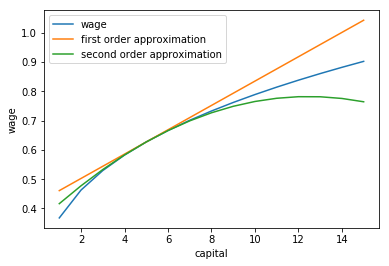

Observe that they intersect at k=5


In [41]:
#plot grid solutions 

kgrid = np.linspace(1, 15, 15)
wgrid_truth = np.zeros_like(kgrid)
wgrid_1 = np.zeros_like(kgrid)
wgrid_2 = np.zeros_like(kgrid)
for i in range(15):
    wgrid_truth[i] = get_w_ss(kgrid[i], 0.5)
#for i in range(3, 15):
#    wgrid1[i] = get_wss(kgrid[i], 0.8)
for i in range(15):
    wgrid_1[i] = first_approx(f, 5, kgrid[i]) 
    wgrid_2[i] = second_approx(f, 5, kgrid[i]) 
plt.plot(kgrid, wgrid_truth, label='wage')
plt.plot(kgrid, wgrid_1, label='first order approximation')
plt.plot(kgrid, wgrid_2, label ='second order approximation')
plt.legend()
plt.xlabel('capital')
plt.ylabel('wage')
plt.show()
print("Observe that they intersect at k=5")

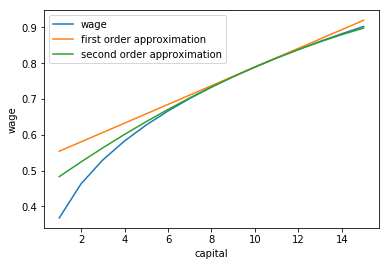

Observe that they intersect at k=10


In [42]:
# Repeat for k = 10

kgrid = np.linspace(1, 15, 15)
wgrid_truth = np.zeros_like(kgrid)
wgrid_1 = np.zeros_like(kgrid)
wgrid_2 = np.zeros_like(kgrid)
for i in range(15):
    wgrid_truth[i] = get_w_ss(kgrid[i], 0.5)
#for i in range(3, 15):
#    wgrid1[i] = get_wss(kgrid[i], 0.8)
for i in range(15):
    wgrid_1[i] = first_approx(f, 10, kgrid[i]) 
    wgrid_2[i] = second_approx(f, 10, kgrid[i]) 
plt.plot(kgrid, wgrid_truth, label='wage')
plt.plot(kgrid, wgrid_1, label='first order approximation')
plt.plot(kgrid, wgrid_2, label ='second order approximation')
plt.legend()
plt.xlabel('capital')
plt.ylabel('wage')
plt.show()
print("Observe that they intersect at k=10")

In [3]:
#Problem 3
x, y = symbols('x y')
f = (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)
Fx = diff(f, x)
Fy = diff(f, y)
Fxx = diff(Fx, x)
Fxy = diff(Fx, y)
Fyy = diff(Fy, y)
Fxxx = diff(Fxx, x)
Fxxy = diff(Fxx, y)
Fxyy = diff(Fxy, y)
Fyyy = diff(Fyy, y)

In [4]:
#show some results
Fx

(-0.875*x**(-0.65) - 2.25)*(x**0.35 + 0.9*x - y)**(-3.5)

In [5]:
Fxx

0.56875*x**(-1.65)*(x**0.35 + 0.9*x - y)**(-3.5) + (-1.225*x**(-0.65) - 3.15)*(-0.875*x**(-0.65) - 2.25)*(x**0.35 + 0.9*x - y)**(-4.5)

In [6]:
Fxxx

-0.9384375*x**(-2.65)*(x**0.35 + 0.9*x - y)**(-3.5) + 1.1375*x**(-1.65)*(-1.225*x**(-0.65) - 3.15)*(x**0.35 + 0.9*x - y)**(-4.5) + 0.79625*x**(-1.65)*(-0.875*x**(-0.65) - 2.25)*(x**0.35 + 0.9*x - y)**(-4.5) + (-1.575*x**(-0.65) - 4.05)*(-1.225*x**(-0.65) - 3.15)*(-0.875*x**(-0.65) - 2.25)*(x**0.35 + 0.9*x - y)**(-5.5)

In [7]:

Fx = lambdify((x,y), Fx, 'numpy')
Fy = lambdify((x,y), Fy, 'numpy')
Fxx = lambdify((x,y), Fxx, 'numpy')
Fxy = lambdify((x,y), Fxy, 'numpy')
Fyy = lambdify((x,y), Fyy, 'numpy')
Fxxx = lambdify((x,y), Fxxx, 'numpy')
Fxxy = lambdify((x,y), Fxxy, 'numpy')
Fxyy = lambdify((x,y), Fxyy, 'numpy')
Fyyy = lambdify((x,y), Fyyy, 'numpy')


In [8]:
xy = lambda x, y: -Fy(x,y)/Fx(x,y)
xyy = lambda x, y: -(Fxx(x,y)*xy(x,y) + 2*Fxy(x,y)*xy(x,y) + Fyy(x,y))/Fx(x,y)
xyyy = lambda x, y: -(Fxxx(x,y)*xy(x,y)**3+3*Fxxy(x,y)*xy(x,y)**2+3*Fxx(x,y)*xyy(x,y)*xy(x,y)+3*Fxyy(x,y)*xy(x,y)+
         3*Fxy(x,y)*xyy(x,y)+Fyyy(x,y))/Fx(x,y)

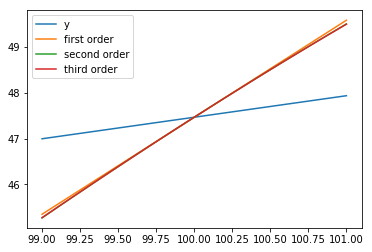

In [9]:
def eq_of_y(y, arg):
    x = arg
    return (x ** .35 + .9 * x - y) ** (-2.5) - 0.95 * (y ** 0.35 + 0.9 * y) ** (-2.5)

x0 = 100
y0 = opt.fsolve(eq_of_y, 49.21, args = (x0))

xgrid = np.linspace(99, 101, 50)
ygrid1 = np.zeros_like(xgrid)
ygrid2 = np.zeros_like(xgrid)
ygrid3 = np.zeros_like(xgrid)
ygrid4 = np.zeros_like(xgrid)

for i in range(50):
    ygrid1[i] = opt.fsolve(eq_of_y, 49, args = (xgrid[i]))
y1 = ygrid1[0]
y2 = ygrid1[-1]
ygrid = np.linspace(y1, y2, 50)
for i in range(50):
    ygrid2[i] = y0+xy(x0, y0)*(xgrid[i]-x0)
    ygrid3[i] = y0+xy(x0, y0)*(xgrid[i]-x0) + (1/2)*xyy(x0, y0)*(xgrid[i]-x0) ** 2
    ygrid4[i] = y0+xy(x0, y0)*(xgrid[i]-x0)+(1/2)*xyy(x0, y0)*(xgrid[i]-x0)**2+(1/6)*\
               xyyy(x0, y0)*(xgrid[i]-x0)**3 
plt.plot(xgrid, ygrid1, label='y')
plt.plot(xgrid, ygrid2, label='first order')
plt.plot(xgrid, ygrid3, label='second order')
plt.plot(xgrid, ygrid4, label='third order')

plt.legend()
plt.show()

In [13]:
#Problem 4
alpha = 0.35
beta = 0.98 
k = (alpha * beta) ** (1/(1 - alpha))
Xu = 0.35

x, y, u, a, b = symbols('x y u a b')
f = 1/(u ** a - x) - b * a * x ** (a - 1)/(x ** a - y)
Fx = diff(f, x)
Fy = diff(f, y)
Fyy = diff(Fy, y)
Fyx = diff(Fy, x)
Fyu = diff(Fy, u)
Fxx = diff(Fx, x)
Fxu = diff(Fx, u)
Fuu = diff(diff(f, u), u)

Fx = lambdify((x, y, u, a, b), Fx, 'numpy')
Fy = lambdify((x, y, u, a, b), Fy, 'numpy')
Fyy = lambdify((x, y, u, a, b), Fyy, 'numpy')
Fxx = lambdify((x, y, u, a, b), Fxx, 'numpy')
Fyx = lambdify((x, y, u, a, b), Fyx, 'numpy')
Fyu = lambdify((x, y, u, a, b), Fyu, 'numpy')
Fxu = lambdify((x, y, u, a, b), Fxu, 'numpy')
Fuu = lambdify((x, y, u, a, b), Fuu, 'numpy')

Fx = Fx(k,k,k,alpha,beta)
Fy = Fy(k,k,k,alpha,beta)
Fyy = Fyy(k,k,k,alpha,beta)
Fyx = Fyx(k,k,k,alpha,beta)
Fxx = Fxx(k,k,k,alpha,beta)
Fyu = Fyu(k,k,k,alpha,beta)
Fxu = Fxu(k,k,k,alpha,beta)
Fuu = Fuu(k,k,k,alpha,beta)

Xuu = -(Fyy*Xu**4+2*Fyx*Xu**3+2*Fyu*Xu**2+Fxx*Xu**2+2*Fxu*Xu+Fuu)/(Fy*Xu**2+Fy*Xu+Fx)
print('The second order derivative is: ', Xuu)



The second order derivative is:  -1.1800856355648073


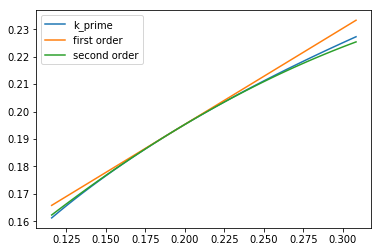

In [16]:
kgrid = np.linspace(0.6*k, 1.6*k, 40)
k1 = alpha * beta * kgrid ** alpha
k2 = np.zeros(40)
k3 = np.zeros(40)
for i in range(40):
    k2[i] = k + Xu * (kgrid[i] - k)
    k3[i] = k + Xu * (kgrid[i] - k) + (1/2) * Xuu * (kgrid[i] - k) ** 2
plt.plot(kgrid, k1, label='k_prime')
plt.plot(kgrid, k2, label='first order')
plt.plot(kgrid, k3, label = 'second order')
plt.legend()
plt.show()